In [1]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
!pip install seaborn --upgrade
import seaborn as sns
import matplotlib as mpl
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#한글 폰트 설정
import matplotlib.font_manager as fm
plt.rcParams['axes.unicode_minus'] = False
font_path = '../input/font-nanumgothic/NanumGothic.ttf'
#ticks에 적용될 한글 폰트
font_ticks = fm.FontProperties(fname=font_path, size=10)
#title에 적용될 한글 폰트
font_title = fm.FontProperties(fname=font_path, size=13)


import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: seaborn in c:\users\ilove\anaconda3\lib\site-packages (0.11.0)


In [2]:
import csv
people_raw = pd.read_csv('new_people.csv', encoding='cp949')
process_raw = pd.read_csv('process.csv')
suggest_raw = pd.read_csv('suggest.csv')

In [3]:
print(people_raw.shape)
print(process_raw.shape)
print(suggest_raw.shape)

(5605, 16)
(68530, 28)
(62658, 12)


In [4]:
people = people_raw.copy()
process = process_raw.copy()
suggest = suggest_raw.copy()

In [5]:
people.head()

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL
0,21,제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산...,21대의원,강기윤,姜起潤,NaN,NaN,1960년 06월 04일,NaN,NaN,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
1,21,제21대국회의원(대구동구을) 정당_74,21대의원,강대식,姜大植,NaN,NaN,1959년 11월 02일,NaN,NaN,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\...",NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
2,21,제21대국회의원(경기안양시만안구) 정당_7,21대의원,강득구,姜得求,NaN,NaN,1963년 05월 27일,NaN,NaN,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...,NaN,2015. 우산이 필요한 당신에게\r\n2019. 득구있다,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
3,21,제21대국회의원(경남진주시을) 정당_74,21대의원,강민국,姜旻局,NaN,NaN,1971년 03월 03일,NaN,NaN,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
4,21,제21대국회의원(비례대표) 정당_30,21대의원,강민정,姜旼姃,NaN,NaN,1961년 04월 26일,NaN,NaN,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...,NaN,"2013. 교사와 학부모가 함께 읽는 주제통합수업\r\n2017. 혁신학교, 한국교...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...


In [6]:
process.head()

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,...,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
2,21,NaN,NaN,NaN,NaN,PRC_B2C0D0H9S2D4W1P3U3V0E2P2Y0B0R9,기타,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,한정애의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
3,21,NaN,NaN,NaN,NaN,PRC_O2T0Q0J9B2M3U2U0L0E0W1G5F6O7A5,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
4,21,NaN,NaN,NaN,NaN,PRC_E2O0V0L9L2C1E1Q3W0E4Y2A2W8I9P6,기타,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,NaN,...,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN


In [7]:
suggest.head()

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"
2,PRC_C2Q0L1M0V0B5G1O8H1N6Z5V0W5W7A7,2104400,농업기계화 촉진법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"
3,PRC_F2A0Q1V0F0S5O1N8W1P6L2Z9T9D6K3,2104399,지방교부세법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,신정훈,오영환,윤재갑,윤준병,이개호,이성만,전혜숙,최형두"
4,PRC_C2N0L1B0M0O5S1P8T0O6I1O8S4J8O7,2104398,농수산물의 원산지 표시에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"


In [8]:
suggest = suggest.replace({'':np.nan})

In [9]:
suggest['year'] = suggest['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})
suggest['PROPOSE_DT'] = pd.to_datetime(suggest['PROPOSE_DT'])

In [10]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from matplotlib import pyplot as plt
import cv2

import networkx as nx
import plotly.graph_objects as go
import plotly.express as px

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf

In [12]:
people_raw.isnull().sum(axis = 0).sort_values(ascending = False)
# 8개의 columns에서 결측이 관측됨.

JA          5515
HO          4222
BOOK        3725
SANG        3375
HOBBY       3308
BON         2828
POSI        1288
HAK            7
URL            0
DEAD           0
BIRTH          0
NAME_HAN       0
NAME           0
DAE_NM         0
DAE            0
DAESU          0
dtype: int64

In [13]:
people_raw.shape

(5605, 16)

In [14]:
people_raw.columns

Index(['DAESU', 'DAE', 'DAE_NM', 'NAME', 'NAME_HAN', 'JA', 'HO', 'BIRTH',
       'BON', 'POSI', 'HAK', 'HOBBY', 'BOOK', 'SANG', 'DEAD', 'URL'],
      dtype='object')

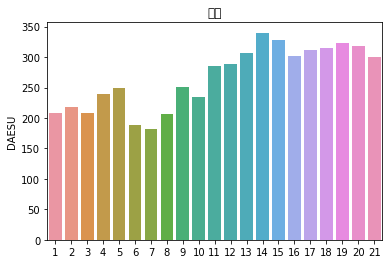

In [15]:
sns.barplot(x = people_raw.DAESU.value_counts().index,
            y = people_raw.DAESU.value_counts())
plt.title('대수')
plt.show()

In [16]:
len(people_raw[people_raw.DAE.apply(lambda x: '비례대표' in x)])

450

In [17]:
len(people_raw)

5605

In [18]:
print(len(people_raw[people_raw.DAE.apply(lambda x: '비례대표' in x)]) / len(people_raw) * 100, '%')

8.028545941123996 %


In [19]:
people_raw['people'] = people_raw.NAME + people_raw.BIRTH

In [20]:
len(people_raw)

5605

In [21]:
len(people_raw['people'].unique())

3066

In [22]:
print(len(people_raw['people'].unique())* 100/len(people_raw),"%")

54.70115967885816 %


In [23]:
people_raw[people_raw['BON'].isnull() != True].BON     ## 출생지역

17         안동
18         안동
24         선산
25         김해
31         경주
        ...  
5491       平山
5511       파평
5526       전주
5534       원주
5558    경남 진주
Name: BON, Length: 2777, dtype: object